# Importing all libraries


In [4]:
import math # For math functions
from sympy import * # For derivation 
import matplotlib.pyplot as plt # For plotting
import numpy as np # For arrays 


## Defining Functions

In [5]:
def classificationThreshold(thresh,predicted):
    prediction=[]
    for element in predicted:
        if element>thresh:
            prediction.append(1)
        else:
            prediction.append(0)
    return prediction

In [6]:
def symmetricLossFunction(predicted,actual):
    loss=0
    if len(predicted)==len(actual):
        for i in range(len(predicted)):
            if predicted[i]!=actual[i]:
                loss+=1
    return loss

In [7]:
def CrossEntropyLossFunction(predicted,actual):
    import math
    loss=0
    temp=[]
    if len(predicted)==len(actual):
        for i in range(len(predicted)):
            loss+=-((actual[i]*math.log2(predicted[i]))+((1-actual[i])*math.log2(1-predicted[i])))
           
        loss/=len(predicted)
    return loss


In [8]:
def hingeLoss(predicted,actual):
    # In hingeloss we label the output of the actual targets as +1 and -1 . Let 1 be +1 and 0 be -1
    hingeLoss=0
    for prediction,target in zip(predicted,actual):
        loss=max(0,1-(prediction*target))
        hingeLoss+=loss
    return hingeLoss

### Calculating Losses

In [22]:
# Data as per the question
predicted=[1,1,1,1,1,1,1,1,1,1]
actual=[0,1,0,0,1,0,0,1,1,1]

In [23]:
# Converting the output to discrete values
predictedClassified=classificationThreshold(0.5,predicted)


> a) symmetric 0 −1 loss function

In [24]:
print('The symmetric loss function :',symmetricLossFunction(predictedClassified,actual))

The symmetric loss function : 5


> b) the cross-entropy loss function

In [25]:
print(' The Cross entropy loss function :',CrossEntropyLossFunction(predicted,actual))

ValueError: math domain error

> c) the hinge loss function

In [10]:
# Converting the output values to +1 and -1
for i in range(len(actual)):
    if actual[i]==1:
        pass
    elif actual[i]==0:
        actual[i]=-1
    else:
        pass # If its already -1 and +1, ignore

print('The Hinge Loss : ',hingeLoss(predicted,actual))

The Hinge Loss :  10.000000000000002


# Question 2

Consider the function f(x) = 1 + sin(x).
> Use a first order Taylor’s expansion to approximate the function
at 3π/4. Plot such an approximation of f(x) around 3π/4. (10
points)


>Use a second order Taylor’s expansion to approximate the function
at 3π/4. Plot such an approximation of f(x) around 3π/4. (10
points)

>What would happen if you progressively include higher order terms?
(10 points)

<b>Answer:</b>
First Order Taylor Series:
><i> f(x) + f'(x) (x-a)</i> 

where<i> f'(x)</i> is the first derivate and a=3π/4

In [9]:
# Function to calculate factorial for denominator
def factorial(n):
    result=1
    for i in range(1,n+1):
        result*=i
    return result

### Creating a function to generate a Taylor series for any function and for any order

In [461]:
#Creating the taylor expansion
from sympy import *

def taylorSeries(func,number):
    """ This function takes as input the input function and number of terms and returns the corresponding taylor series 
    """
    x,a=symbols('x,a')
    numberOfTerms=number+1
    f=func
    power=0
    denominator=1
    taylor=0
    for i in range(numberOfTerms):
        power=i
        denominator=factorial(i)
        term=f*(pow(x-a,power))/denominator
        f=Derivative(f,a).doit()
        taylor+=term
    return taylor


### Creating a plot for first order taylor series

In [462]:
# Finding the first order taylor series 
x,a=symbols('x a')
order=1
f=1+sin(a)
function=taylorSeries(f,order)
print('The first order Taylor Function is :')
function

The first order Taylor Function is :


(-a + x)*cos(a) + sin(a) + 1

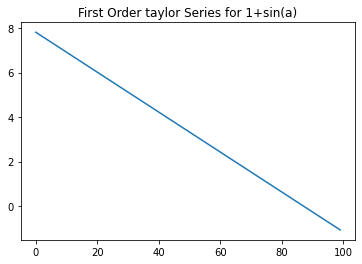

In [463]:
xTerm=np.linspace(-2*math.pi, 2*math.pi,100)
aTerm=3*math.pi/4
result=[]
for xVal in xTerm:
    result.append(function.subs([(x,xVal),(a,aTerm)]))
plt.title('First Order taylor Series for 1+sin(a)')
plt.plot(result)

### Creating a plot for second order taylor series

In [464]:
# Finding the first order taylor series 
x,a=symbols('x a')
order=2
f=1+sin(a)
function=taylorSeries(f,order)
print('The second order Taylor Function is :')
function

The second order Taylor Function is :


-(-a + x)**2*sin(a)/2 + (-a + x)*cos(a) + sin(a) + 1

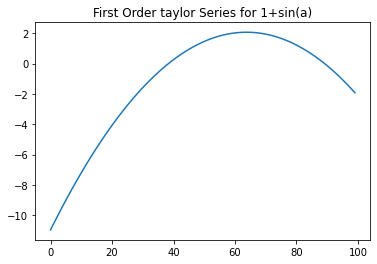

In [465]:
xTerm=np.linspace(-1.5*math.pi, 1.5*math.pi,100)
aTerm=3*math.pi/4
result=[]
for xVal in xTerm:
    result.append(function.subs([(x,xVal),(a,aTerm)]))
plt.title('First Order taylor Series for 1+sin(a)')
plt.plot(result)

### Creating a plot for third order taylor series

In [466]:
# Finding the first order taylor series 
x,a=symbols6014859431120036('x a')
order=3
f=1+sin(a)
function=taylorSeries(f,order)
print('The third order Taylor Function is :')
function

The third order Taylor Function is :


-(-a + x)**3*cos(a)/6 - (-a + x)**2*sin(a)/2 + (-a + x)*cos(a) + sin(a) + 1

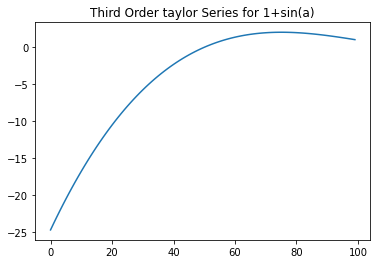

In [467]:
xTerm=np.linspace(-1*math.pi, 1*math.pi,100)
aTerm=3*math.pi/4
result=[]
for xVal in xTerm:
    result.append(function.subs([(x,xVal),(a,aTerm)]))
plt.title('Third Order taylor Series for 1+sin(a)')
plt.plot(result)

### Creating a plot for tenth order taylor series

In [468]:
# Finding the first order taylor series 
x,a=symbols('x a')
order=10
f=1+sin(a)
function=taylorSeries(f,order)
print('The tenth order Taylor Function is :')
function

The tenth order Taylor Function is :


-(-a + x)**10*sin(a)/3628800 + (-a + x)**9*cos(a)/362880 + (-a + x)**8*sin(a)/40320 - (-a + x)**7*cos(a)/5040 - (-a + x)**6*sin(a)/720 + (-a + x)**5*cos(a)/120 + (-a + x)**4*sin(a)/24 - (-a + x)**3*cos(a)/6 - (-a + x)**2*sin(a)/2 + (-a + x)*cos(a) + sin(a) + 1

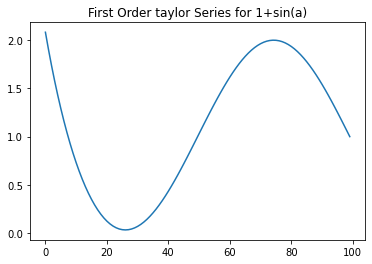

In [469]:
xTerm=np.linspace(-1*math.pi, 1*math.pi,100)
aTerm=3*math.pi/4
result=[]
for xVal in xTerm:
    result.append(function.subs([(x,xVal),(a,aTerm)]))
plt.title('First Order taylor Series for 1+sin(a)')
plt.plot(result)

### It can be seen that for higher order of Taylor series the graphs starts to become similar to the graph for 1+sinx wheras in lower order taylor series, only a small area of the graph is similar to the actual graph. As the order keeps increasing the approximation made by the Taylor series gets closer and closer to the output of the actual function, which in this case is 1+sin(x)

# Question 3

### Assume an error function to be minimized is given by,J(w) = exp(−13 w31 + w1 −w2)
> (a) Plot the contour map of this error function. (10 points

### Contour plot of the exponential function

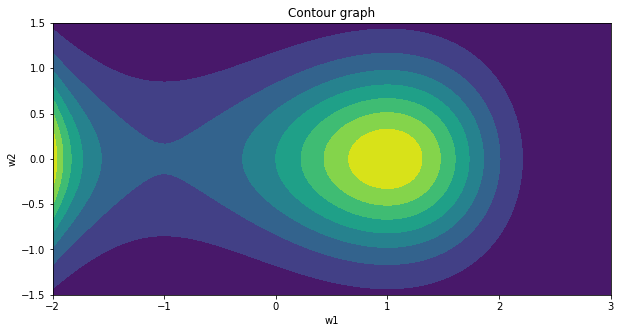

In [19]:
w1=np.linspace(-2,3,100)
w2=np.linspace(-1.5,1.5,100)
[x,y]=np.meshgrid(w1,w2)
powerTerm=(-x**3/3)+x-(y**2)
function=np.exp(powerTerm)
plt.figure(figsize=(10,5))sto
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour graph')
plt.contourf(x,y,function)

> b) Find analytically the gradient vector,
∇(w) =


∂J
∂w1
∂J

In [472]:
from sympy import *
x,y=symbols('x y')
f=exp(x-(pow(x,3)/3)-pow(y,2))
dfx=Derivative(f,x).doit()
dfy=Derivative(f,y).doit()
gradientVector=[0,0]
gradientVector[0]=dfx
gradientVector[1]=dfy
print(gradientVector[0])
print(gradientVector[1])

(1 - x**2)*exp(-x**3/3 + x - y**2)
-2*y*exp(-x**3/3 + x - y**2)


#### For better visualisation of equations

In [476]:
print('The first element of gradient vector is ')
dfx

The first element of gradient vector is 


(1 - x**2)*exp(-x**3/3 + x - y**2)

In [477]:
print('The second element of gradient vector is ')
dfy

The second element of gradient vector is 


-2*y*exp(-x**3/3 + x - y**2)

> c) Identify on the plot you obtained in part (a) using the expression
you obtained in part (b), the gradient vector at three arbitrary
locations. (10 points)

#### For value 0,0

[1.00000000000000, 0]


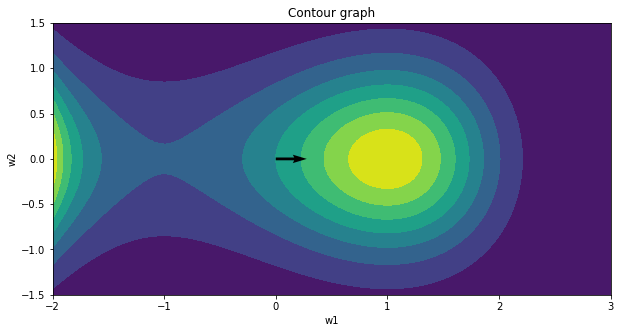

In [478]:
xval=0
yval=0
result=[N(dfx.subs([(x,xval),(y,yval)])),N(dfy.subs([(x,xval),(y,yval)]))]
w1=np.linspace(-2,3,100)
w2=np.linspace(-1.5,1.5,100)
[x1,y1]=np.meshgrid(w1,w2)
powerTerm=(-x1**3/3)+x1-(y1**2)
function=np.exp(powerTerm)
plt.figure(figsize=(10,5))
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour graph')
plt.contourf(x1,y1,function)
plt.quiver(xval,yval,float(result[0]),float(result[1]),width=0.005)

print(result)

#### For value 1.5,0.5

[-1.41643556633353, -1.13314845306683]


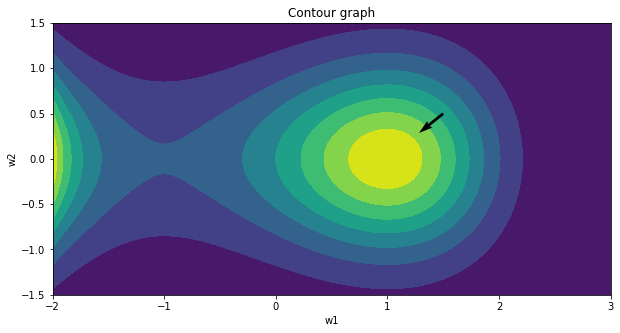

In [479]:
xval=1.5
yval=0.5
result=[N(dfx.subs([(x,xval),(y,yval)])),N(dfy.subs([(x,xval),(y,yval)]))]
w1=np.linspace(-2,3,100)
w2=np.linspace(-1.5,1.5,100)
[x1,y1]=np.meshgrid(w1,w2)
powerTerm=(-x1**3/3)+x1-(y1**2)
function=np.exp(powerTerm)
plt.figure(figsize=(10,5))
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour graph')
plt.contourf(x1,y1,function)
plt.quiver(xval,yval,float(result[0]),float(result[1]),width=0.005)

print(result)

#### For value 1.5,-0.25

[-1.70854742646725, 0.683418970586898]


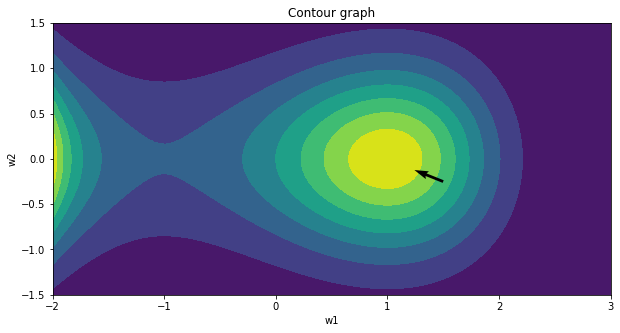

In [480]:
xval=1.5
yval=-0.25
result=[N(dfx.subs([(x,xval),(y,yval)])),N(dfy.subs([(x,xval),(y,yval)]))]
w1=np.linspace(-2,3,100)
w2=np.linspace(-1.5,1.5,100)
[x1,y1]=np.meshgrid(w1,w2)
powerTerm=(-x1**3/3)+x1-(y1**2)
function=np.exp(powerTerm)
plt.figure(figsize=(10,5))
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour graph')
plt.contourf(x1,y1,function)
plt.quiver(xval,yval,float(result[0]),float(result[1]),width=0.005)

print(result)

#### For value 1,0

[0, 0]


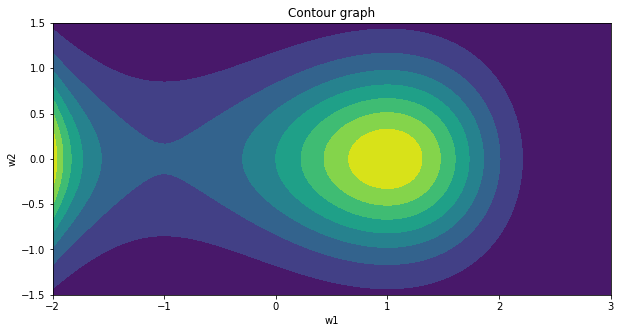

In [482]:
xval=1
yval=0
result=[N(dfx.subs([(x,xval),(y,yval)])),N(dfy.subs([(x,xval),(y,yval)]))]
w1=np.linspace(-2,3,100)
w2=np.linspace(-1.5,1.5,100)
[x1,y1]=np.meshgrid(w1,w2)
powerTerm=(-x1**3/3)+x1-(y1**2)
function=np.exp(powerTerm)
plt.figure(figsize=(10,5))
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour graph')
plt.contourf(x1,y1,function)
plt.quiver(xval,yval,float(result[0]),float(result[1]),width=0.005)

print(result)

It can be seen that for different values the results gets closer to 0 as it approaches the minima. It can also be seen that the arrow points towards the minima, where the directions are obtained from the results. In the last graph the arrow is not printed because it has reached the minima

> d) If feasible, find analytically the weight vector that minimizes the
error function such that ∇(w) = 0. (10 points) 

In [483]:
# generating the input terms for calculating Gradient Descent

from sympy import *
x,y=symbols('x y')
f=exp((-(x**3)/3)+x-(y**2)) # Given Loss function,f

dfx=Derivative(f,x).doit() #Creating gradient vector by derivation
dfy=Derivative(f,y).doit()

delFunction=[0,0]
delFunction[0]=dfx
delFunction[1]=dfy

In [489]:
# The assumed input to start with
# This can be the actual predictions from a model / system
assumedInput=np.array([2,2])

In [491]:
for i in range(20):
    xValue=assumedInput[0]
    yValue=assumedInput[1]
    stepSize=100
    gradientVector=[0,0]
    gradientVector[0]=float(N(delFunction[0].subs([(x,xValue),(y,yValue)])))
    gradientVector[1]=float(N(delFunction[1].subs([(x,xValue),(y,yValue)])))
    # Updating the input vector
    assumedInput=assumedInput-stepSize*np.array(gradientVector)
    print(assumedInput)

[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]
[4.82106877 5.76142502]


#### For all values of x,y the loss functions keeps increasing. However, on testing the same code with other functions, it was found that the values were decreasing. 

#### It can be because the point identified in the contour can be a local maxima and not a local minima. That may be the reason why the gradient descent fails to find the lower values. 